In [1]:
!pip install kneed

In [2]:
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
# from kneed import KneeLocator

# Clustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import ward,dendrogram,linkage
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Model performance
from sklearn.preprocessing import  StandardScaler
from sklearn import metrics
from sklearn.metrics import silhouette_score
from tqdm import tqdm
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

#warnings
import warnings
warnings.simplefilter(action='ignore')

In [3]:
# bronx_df = pd.read_csv("/content/drive/MyDrive/Bronx_Combined.csv")
# kings_df = pd.read_csv("/content/drive/MyDrive/Kings_Combined.csv")
# ny_df = pd.read_csv("/content/drive/MyDrive/NY_combined.csv")
# queen_df = pd.read_csv("/content/drive/MyDrive/Queens_Combined.csv")
richmond_df = pd.read_csv("/content/drive/MyDrive/RichMond_Combined.csv")

**Richmond Clustering**

In [62]:
richmond_df = richmond_df.sample(n=200, random_state=42)
richmond_df.head()

,Unnamed: 0,County,Borough,TotalPop,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,Employed,Latitude,Longitude
6152,6152,Richmond,Staten Island,3446,84063.0,16491.0,33316.0,3183.0,2.4,1454,40.527487,-74.166030
4902,4902,Richmond,Staten Island,3576,44861.0,35307.0,19428.0,5461.0,17.6,1411,40.588543,-74.055226
8955,8955,Richmond,Staten Island,2627,60511.0,11900.0,26332.0,5238.0,15.1,1140,40.574975,-74.147035
1883,1883,Richmond,Staten Island,3205,66528.0,24493.0,28301.0,4779.0,3.7,1319,40.522965,-74.086884
4742,4742,Richmond,Staten Island,1531,14030.0,2042.0,7082.0,1729.0,68.3,261,40.608894,-74.083719


In [64]:
new_richmond_df = richmond_df.drop(columns = ['Unnamed: 0', 'County', 'Borough','Latitude','Longitude'])
new_richmond_df.head()

,TotalPop,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,Employed
6152,3446,84063.0,16491.0,33316.0,3183.0,2.4,1454
4902,3576,44861.0,35307.0,19428.0,5461.0,17.6,1411
8955,2627,60511.0,11900.0,26332.0,5238.0,15.1,1140
1883,3205,66528.0,24493.0,28301.0,4779.0,3.7,1319
4742,1531,14030.0,2042.0,7082.0,1729.0,68.3,261


In [65]:
from sklearn.preprocessing import StandardScaler
numerical_columns = ['TotalPop', 'Income', 'IncomeErr','IncomePerCap', 'IncomePerCapErr', 'Poverty', 'Employed']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
new_richmond_df[numerical_columns] = scaler.fit_transform(new_richmond_df[numerical_columns])

new_richmond_df.head()

,TotalPop,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,Employed
6152,-0.430616,0.648600,0.367219,0.243989,-0.762862,-0.955923,-0.491793
4902,-0.371264,-1.193719,3.391173,-1.438706,0.594932,0.298450,-0.535750
8955,-0.804535,-0.458239,-0.370609,-0.602205,0.462013,0.092139,-0.812785
1883,-0.540646,-0.175467,1.653235,-0.363638,0.188428,-0.848641,-0.629799
4742,-1.304919,-2.642639,-1.954906,-2.934570,-1.629513,4.482445,-1.711358


In [67]:
PCA_4 = PCA(n_components=4)
X_PCA_4 = PCA_4.fit_transform(new_richmond_df)
PC = pd.DataFrame(X_PCA_4, columns=['PC1 PC2 PC3 PC4'.split()])
PC

,PC1,PC2,PC3,PC4
0,-0.724482,-0.283133,-0.518716,-1.260540
1,0.437268,-1.431111,3.471150,-1.093241
2,0.803310,-1.078757,-0.243617,0.187388
3,-0.549496,-1.068420,1.111676,-1.033916
4,6.628549,-0.915047,-0.260722,0.055327
...,...,...,...,...
195,-0.724482,-0.283133,-0.518716,-1.260540
196,-0.431112,0.203105,-1.243560,-0.685297
197,0.571623,-2.688921,1.878837,0.289422
198,1.641883,0.430668,1.110076,-0.512859


In [68]:
wcss = []
sil_kmeans = []

for i in range(3,9):

    # K-Means Clustering:
    kmeans = KMeans(n_clusters = i, n_init = 100, init='k-means++', random_state = 0)
    kmeans.fit(X_PCA_4)

     # Inertia and Silhouette Score for Clusters using K-Means:
    in_km = kmeans.inertia_
    wcss.append(in_km)
    sil_km = silhouette_score(X_PCA_4, kmeans.labels_)
    sil_kmeans.append(sil_km)

    print('Number of clusters:', i)
    print('KMeans Inertia', in_km)
    print('Silhouette Score for KMeans:', sil_km)
    print()

Number of clusters: 3
KMeans Inertia 713.0910125018331
Silhouette Score for KMeans: 0.2744684654859003

Number of clusters: 4
KMeans Inertia 579.5156232200229
Silhouette Score for KMeans: 0.2820100320665501

Number of clusters: 5
KMeans Inertia 497.4370140383313
Silhouette Score for KMeans: 0.29322444664486225

Number of clusters: 6
KMeans Inertia 437.1458224817613
Silhouette Score for KMeans: 0.3087088687577979

Number of clusters: 7
KMeans Inertia 390.0275087002077
Silhouette Score for KMeans: 0.30523644657835297

Number of clusters: 8
KMeans Inertia 348.04335804838223
Silhouette Score for KMeans: 0.3000031699029177



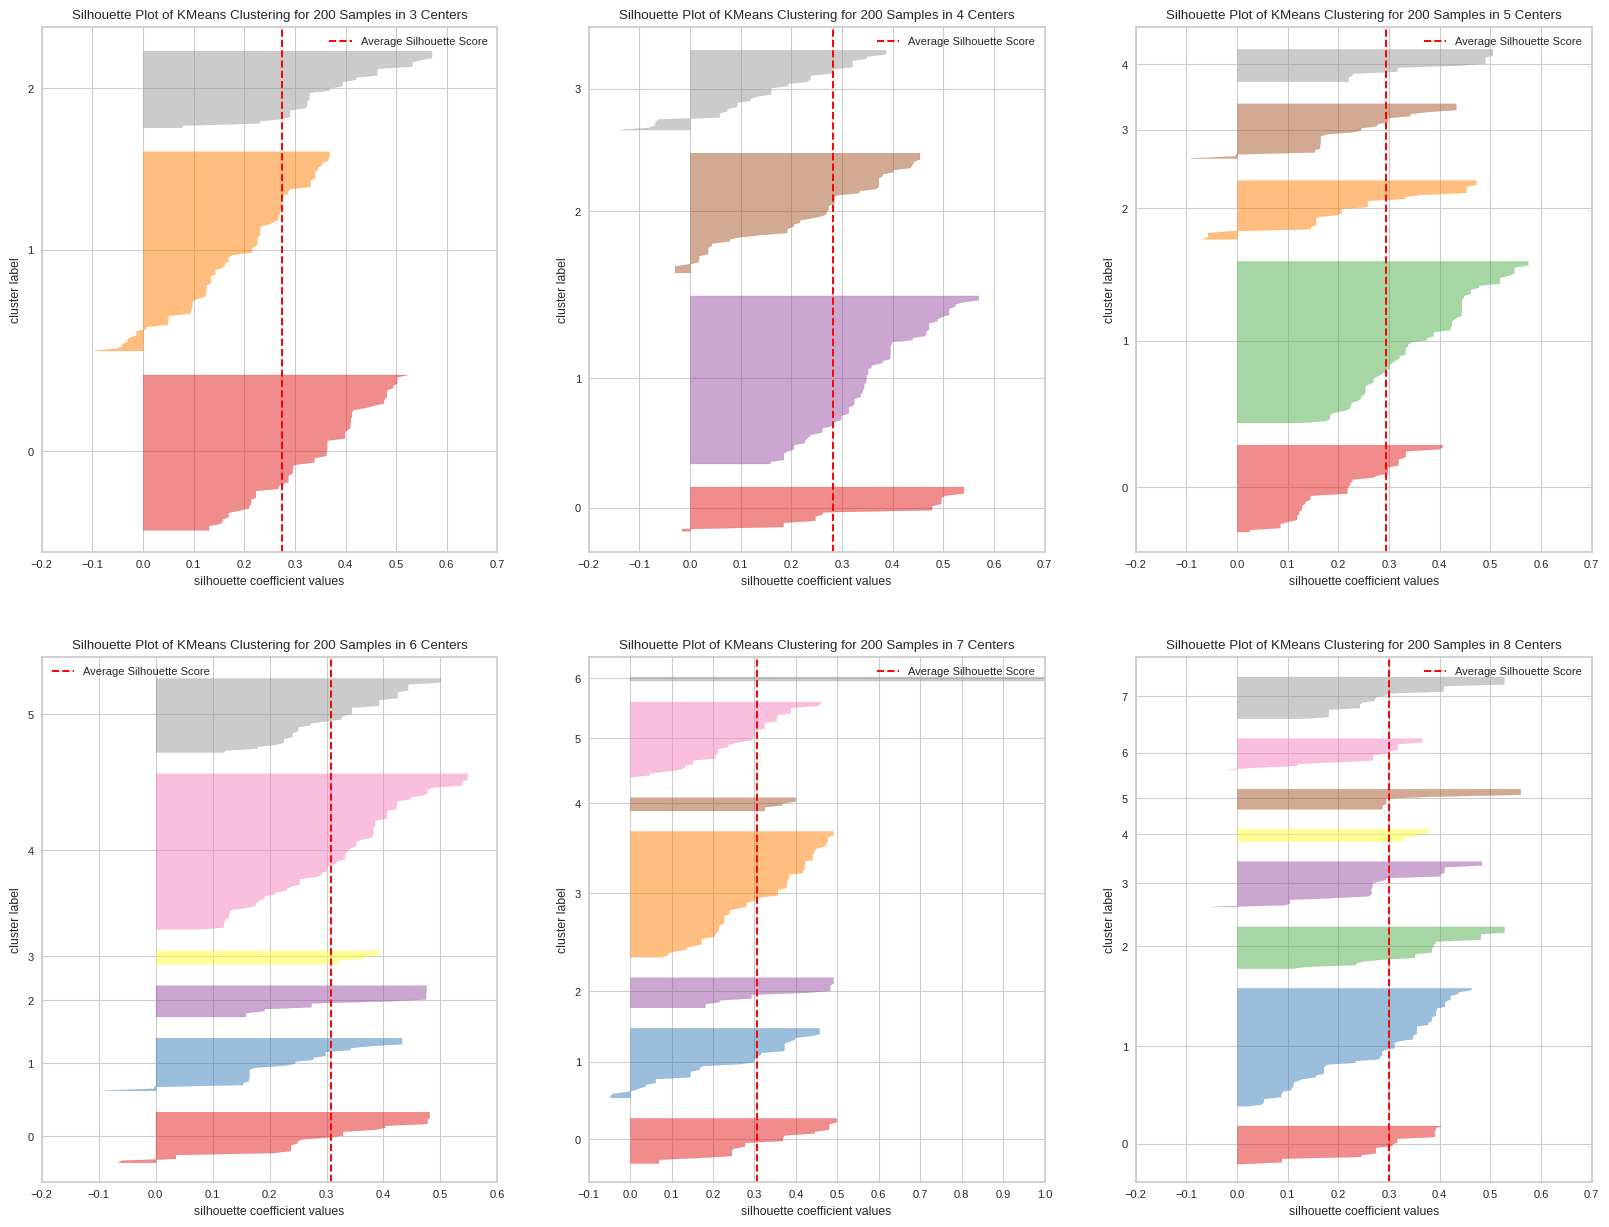

In [69]:
from yellowbrick.cluster import SilhouetteVisualizer
plt.style.use('seaborn-paper')
fig, axs = plt.subplots(2, 3, figsize=(20, 15))
axs = axs.reshape(6)
for i, k in enumerate(range(3, 9)):
    ax = axs[i]
    sil = SilhouetteVisualizer(KMeans(n_clusters = k, n_init = 100, init='k-means++', random_state = 0), ax=ax)
    sil.fit(X_PCA_4)
    sil.finalize()

**Going ahead with 6 centers**

In [70]:
km_6 = KMeans(n_clusters = 6, n_init = 100, init='k-means++', random_state = 0)
KM_6 = km_6.fit(X_PCA_4)

In [73]:
KM_6.labels_

array([4, 3, 5, 4, 2, 5, 0, 1, 2, 4, 5, 2, 4, 1, 4, 0, 4, 2, 1, 4, 4, 4,
       4, 4, 5, 4, 4, 2, 2, 5, 2, 0, 5, 4, 0, 4, 4, 1, 1, 2, 1, 4, 0, 4,
       4, 4, 1, 4, 1, 3, 5, 0, 2, 1, 4, 4, 4, 4, 0, 5, 4, 4, 3, 1, 5, 5,
       4, 1, 0, 4, 4, 0, 0, 4, 4, 0, 5, 4, 1, 4, 1, 1, 5, 4, 5, 5, 5, 0,
       4, 4, 0, 5, 0, 0, 4, 1, 4, 2, 4, 4, 5, 1, 5, 5, 1, 4, 4, 3, 4, 4,
       0, 4, 4, 4, 1, 2, 0, 4, 5, 4, 5, 4, 0, 4, 5, 5, 4, 4, 2, 1, 4, 0,
       5, 2, 1, 4, 4, 4, 1, 4, 4, 0, 4, 2, 2, 4, 5, 4, 1, 4, 1, 0, 4, 4,
       3, 4, 1, 0, 4, 5, 4, 4, 4, 4, 5, 0, 4, 4, 5, 0, 3, 1, 2, 3, 5, 1,
       2, 4, 1, 1, 5, 5, 4, 5, 5, 0, 0, 5, 5, 0, 4, 4, 5, 4, 5, 4, 4, 3,
       5, 5], dtype=int32)

In [71]:
richmond_df['cluster_6'] = KM_6.labels_

In [72]:
richmond_df.to_csv("/content/drive/MyDrive/RichMond_Combined.csv")

**Queens County Clustering**

In [52]:
queen_df = queen_df.sample(n=200, random_state=42)
queen_df.head()

,Unnamed: 0,County,Borough,TotalPop,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,Employed,Latitude,Longitude
299041,299041,Queens,Queens,3836,34141.0,11975.0,23097.0,2489.0,16.3,1660,40.563668,-73.922261
352298,352298,Queens,Queens,6078,69891.0,19160.0,33533.0,3143.0,5.8,2672,40.735528,-73.786131
174174,174174,Queens,Queens,4748,54569.0,7371.0,19170.0,2571.0,17.0,2528,40.708392,-73.732312
211499,211499,Queens,Queens,1866,54620.0,14398.0,23741.0,3576.0,9.3,891,40.527487,-73.988744
147117,147117,Queens,Queens,3044,74336.0,19823.0,27150.0,3965.0,6.2,1460,40.735528,-73.881106


In [53]:
new_queen_df = queen_df.drop(columns = ['Unnamed: 0', 'County', 'Borough','Latitude','Longitude'])
new_queen_df.head()

,TotalPop,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,Employed
299041,3836,34141.0,11975.0,23097.0,2489.0,16.3,1660
352298,6078,69891.0,19160.0,33533.0,3143.0,5.8,2672
174174,4748,54569.0,7371.0,19170.0,2571.0,17.0,2528
211499,1866,54620.0,14398.0,23741.0,3576.0,9.3,891
147117,3044,74336.0,19823.0,27150.0,3965.0,6.2,1460


In [54]:
from sklearn.preprocessing import StandardScaler
numerical_columns = ['TotalPop', 'Income', 'IncomeErr','IncomePerCap', 'IncomePerCapErr', 'Poverty', 'Employed']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
new_queen_df[numerical_columns] = scaler.fit_transform(new_queen_df[numerical_columns])

new_queen_df.head()

,TotalPop,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,Employed
299041,0.165272,-1.512358,-0.215650,-0.507614,-0.718846,0.380778,-0.040875
352298,1.378487,0.278700,0.660750,0.437364,-0.482446,-0.902950,1.080457
174174,0.658783,-0.488925,-0.777229,-0.863203,-0.689205,0.466360,0.920900
211499,-0.900755,-0.486370,0.079899,-0.449300,-0.325930,-0.475041,-0.892955
147117,-0.263303,0.501393,0.741620,-0.140616,-0.185319,-0.854046,-0.262483


In [55]:
PCA_4 = PCA(n_components=4)
X_PCA_4 = PCA_4.fit_transform(new_queen_df)
PC = pd.DataFrame(X_PCA_4, columns=['PC1 PC2 PC3 PC4'.split()])
PC

,PC1,PC2,PC3,PC4
0,-1.448730,-0.640699,0.065871,0.018706
1,-0.072494,1.745473,1.247821,-0.115625
2,-1.792151,0.410781,0.056683,-0.227777
3,0.221384,-1.295773,0.155881,-0.593629
4,0.833852,-0.162953,0.897803,-0.369087
...,...,...,...,...
195,0.568007,1.538955,0.151017,0.234587
196,-2.259080,1.043531,-0.071998,0.137858
197,5.749473,1.887895,-2.013059,0.787661
198,0.355281,-0.890740,-0.163625,-1.185586


In [56]:
wcss = []
sil_kmeans = []

for i in range(3,9):

    # K-Means Clustering:
    kmeans = KMeans(n_clusters = i, n_init = 100, init='k-means++', random_state = 0)
    kmeans.fit(X_PCA_4)

     # Inertia and Silhouette Score for Clusters using K-Means:
    in_km = kmeans.inertia_
    wcss.append(in_km)
    sil_km = silhouette_score(X_PCA_4, kmeans.labels_)
    sil_kmeans.append(sil_km)

    print('Number of clusters:', i)
    print('KMeans Inertia', in_km)
    print('Silhouette Score for KMeans:', sil_km)
    print()

Number of clusters: 3
KMeans Inertia 713.1330463531274
Silhouette Score for KMeans: 0.30504934593518046

Number of clusters: 4
KMeans Inertia 565.4025545827329
Silhouette Score for KMeans: 0.27134772656070494

Number of clusters: 5
KMeans Inertia 483.2293307704789
Silhouette Score for KMeans: 0.2737776302509723

Number of clusters: 6
KMeans Inertia 423.99918615123283
Silhouette Score for KMeans: 0.24167954002587014

Number of clusters: 7
KMeans Inertia 375.81765629159815
Silhouette Score for KMeans: 0.24821880271540828

Number of clusters: 8
KMeans Inertia 337.54719152043333
Silhouette Score for KMeans: 0.26435933827023456



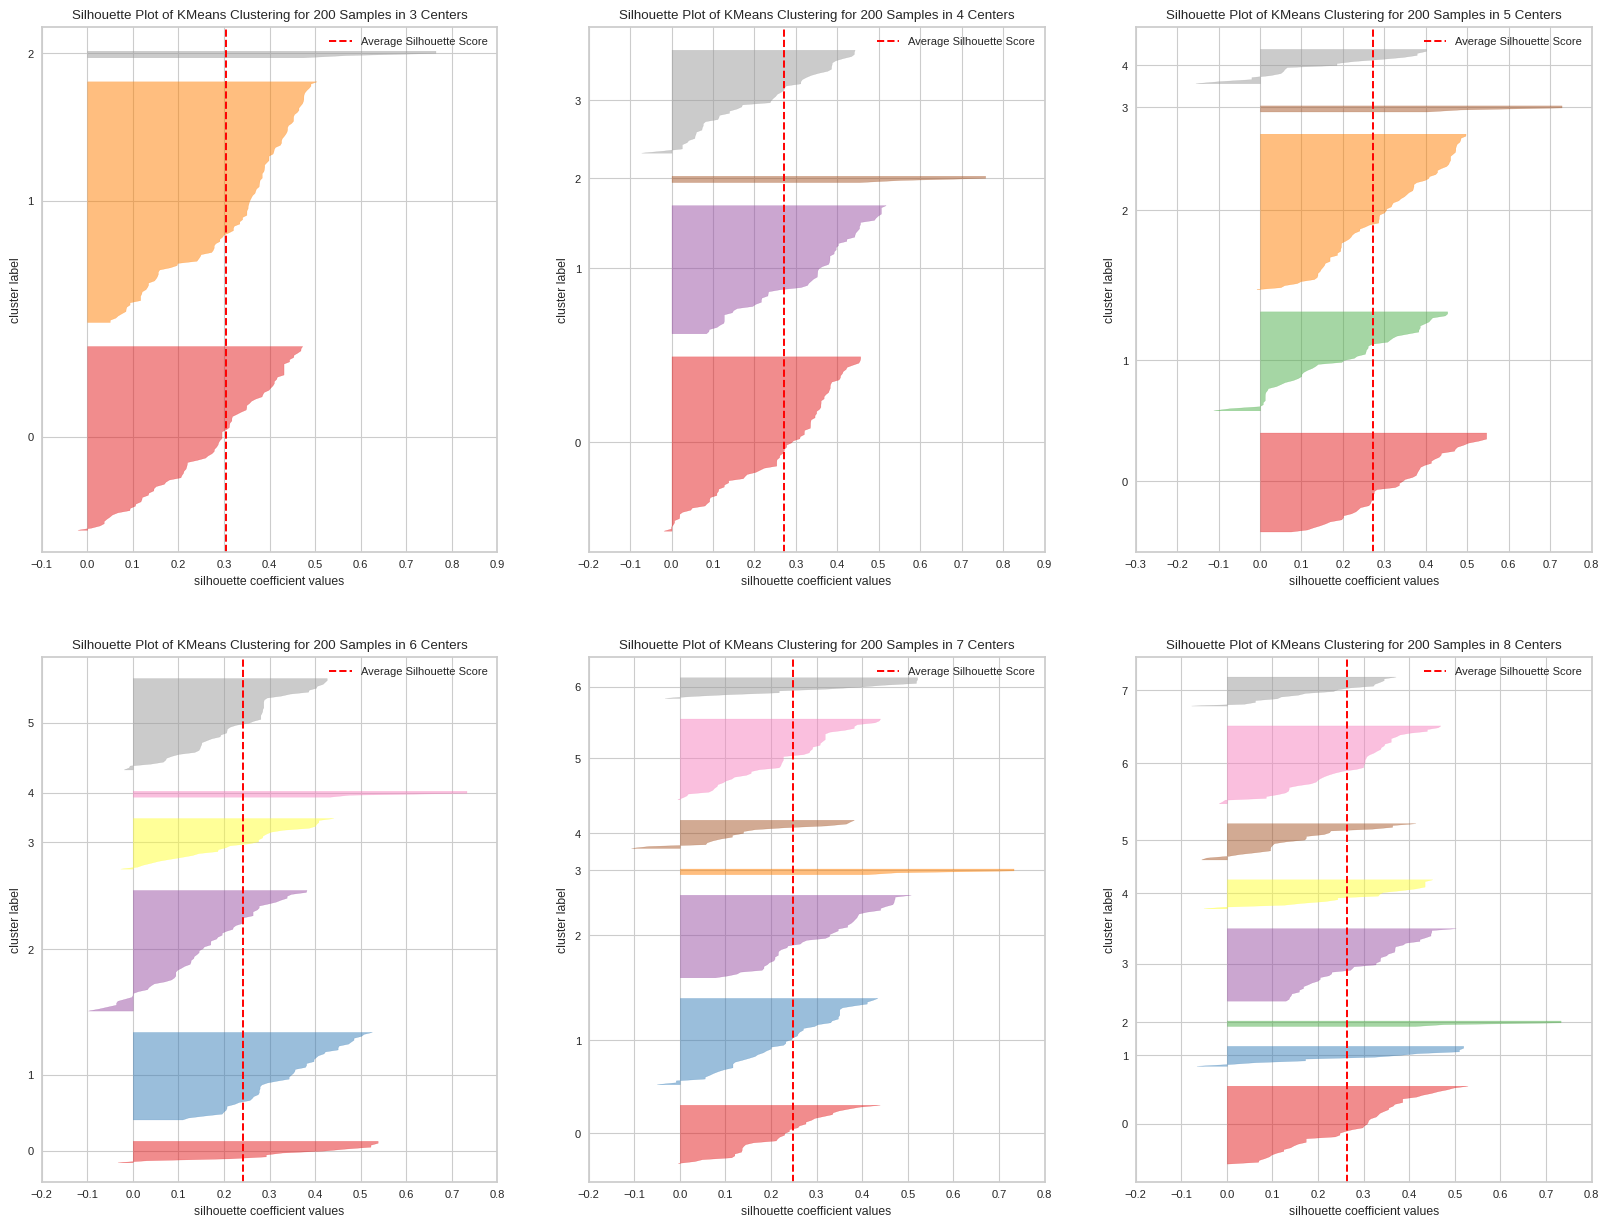

In [57]:
from yellowbrick.cluster import SilhouetteVisualizer
plt.style.use('seaborn-paper')
fig, axs = plt.subplots(2, 3, figsize=(20, 15))
axs = axs.reshape(6)
for i, k in enumerate(range(3, 9)):
    ax = axs[i]
    sil = SilhouetteVisualizer(KMeans(n_clusters = k, n_init = 100, init='k-means++', random_state = 0), ax=ax)
    sil.fit(X_PCA_4)
    sil.finalize()

**Going forward with 4 centers**

In [58]:
km_4 = KMeans(n_clusters = 4, n_init = 100, init='k-means++', random_state = 0)
KM_4 = km_4.fit(X_PCA_4)

In [59]:
queen_df['cluster_4'] = KM_4.labels_

In [60]:
queen_df.head()

,Unnamed: 0,County,Borough,TotalPop,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,Employed,Latitude,Longitude,cluster_4
299041,299041,Queens,Queens,3836,34141.0,11975.0,23097.0,2489.0,16.3,1660,40.563668,-73.922261,1
352298,352298,Queens,Queens,6078,69891.0,19160.0,33533.0,3143.0,5.8,2672,40.735528,-73.786131,3
174174,174174,Queens,Queens,4748,54569.0,7371.0,19170.0,2571.0,17.0,2528,40.708392,-73.732312,3
211499,211499,Queens,Queens,1866,54620.0,14398.0,23741.0,3576.0,9.3,891,40.527487,-73.988744,0
147117,147117,Queens,Queens,3044,74336.0,19823.0,27150.0,3965.0,6.2,1460,40.735528,-73.881106,0


In [61]:
queen_df.to_csv("/content/drive/MyDrive/Queens_Combined.csv")

**NY County Clustering**

In [39]:
ny_df = ny_df.sample(n=200, random_state=42)
ny_df.head()

,Unnamed: 0,County,Borough,TotalPop,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,Employed,Latitude,Longitude
8740,8740,New York,Manhattan,3238,44286.0,12364.0,45340.0,10430.0,32.9,1419,40.848593,-73.928593
71877,71877,New York,Manhattan,11069,48242.0,6962.0,21637.0,2257.0,14.9,5983,40.724221,-73.966583
12662,12662,New York,Manhattan,3726,168375.0,33442.0,104742.0,18715.0,11.9,1996,40.755879,-73.998241
6606,6606,New York,Manhattan,7240,30056.0,7828.0,24697.0,3561.0,34.7,3069,40.753618,-73.979246
20839,20839,New York,Manhattan,8957,111476.0,13572.0,108123.0,17441.0,10.2,6056,40.735528,-73.982412


In [40]:
new_ny_df = ny_df.drop(columns = ['Unnamed: 0', 'County', 'Borough','Latitude','Longitude'])
new_ny_df.head()

,TotalPop,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,Employed
8740,3238,44286.0,12364.0,45340.0,10430.0,32.9,1419
71877,11069,48242.0,6962.0,21637.0,2257.0,14.9,5983
12662,3726,168375.0,33442.0,104742.0,18715.0,11.9,1996
6606,7240,30056.0,7828.0,24697.0,3561.0,34.7,3069
20839,8957,111476.0,13572.0,108123.0,17441.0,10.2,6056


In [41]:
from sklearn.preprocessing import StandardScaler
numerical_columns = ['TotalPop', 'Income', 'IncomeErr','IncomePerCap', 'IncomePerCapErr', 'Poverty', 'Employed']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
new_ny_df[numerical_columns] = scaler.fit_transform(new_ny_df[numerical_columns])

new_ny_df.head()

,TotalPop,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,Employed
8740,-0.819481,-0.829369,-0.404624,-0.497881,-0.140638,1.197443,-0.939961
71877,1.675845,-0.743344,-0.843503,-1.014268,-0.958228,-0.263249,1.589726
12662,-0.663981,1.869022,1.307833,0.796237,0.688156,-0.506698,-0.620148
6606,0.455745,-1.138809,-0.773146,-0.947604,-0.827782,1.343512,-0.025416
20839,1.002862,0.631718,-0.306482,0.869894,0.560711,-0.644652,1.630188


In [43]:
PCA_4 = PCA(n_components=4)
X_PCA_4 = PCA_4.fit_transform(new_ny_df)
PC = pd.DataFrame(X_PCA_4, columns=['PC1 PC2 PC3 PC4'.split()])
PC

,PC1,PC2,PC3,PC4
0,-1.015053,-1.669042,0.462551,-0.165422
1,-2.030089,2.025986,-0.444694,0.066916
2,2.484956,-0.364190,0.030521,0.673870
3,-2.261412,-0.350474,0.484805,0.051852
4,0.650726,2.137441,0.031414,-0.720391
...,...,...,...,...
195,1.940510,-0.523837,-0.776914,0.641903
196,-1.015053,-1.669042,0.462551,-0.165422
197,1.521458,2.157897,0.602339,0.211144
198,-2.874308,-0.220287,0.862688,0.066529


In [44]:
wcss = []
sil_kmeans = []

for i in range(3,9):

    # K-Means Clustering:
    kmeans = KMeans(n_clusters = i, n_init = 100, init='k-means++', random_state = 0)
    kmeans.fit(X_PCA_4)

     # Inertia and Silhouette Score for Clusters using K-Means:
    in_km = kmeans.inertia_
    wcss.append(in_km)
    sil_km = silhouette_score(X_PCA_4, kmeans.labels_)
    sil_kmeans.append(sil_km)

    print('Number of clusters:', i)
    print('KMeans Inertia', in_km)
    print('Silhouette Score for KMeans:', sil_km)
    print()

Number of clusters: 3
KMeans Inertia 580.5350211549487
Silhouette Score for KMeans: 0.36223181580075225

Number of clusters: 4
KMeans Inertia 465.15129670144165
Silhouette Score for KMeans: 0.35143138004934243

Number of clusters: 5
KMeans Inertia 389.92743478769813
Silhouette Score for KMeans: 0.3557407807124058

Number of clusters: 6
KMeans Inertia 325.13682361439527
Silhouette Score for KMeans: 0.3409737665891487

Number of clusters: 7
KMeans Inertia 276.70311979608573
Silhouette Score for KMeans: 0.35319633130123973

Number of clusters: 8
KMeans Inertia 246.7253370701701
Silhouette Score for KMeans: 0.3458560648752477



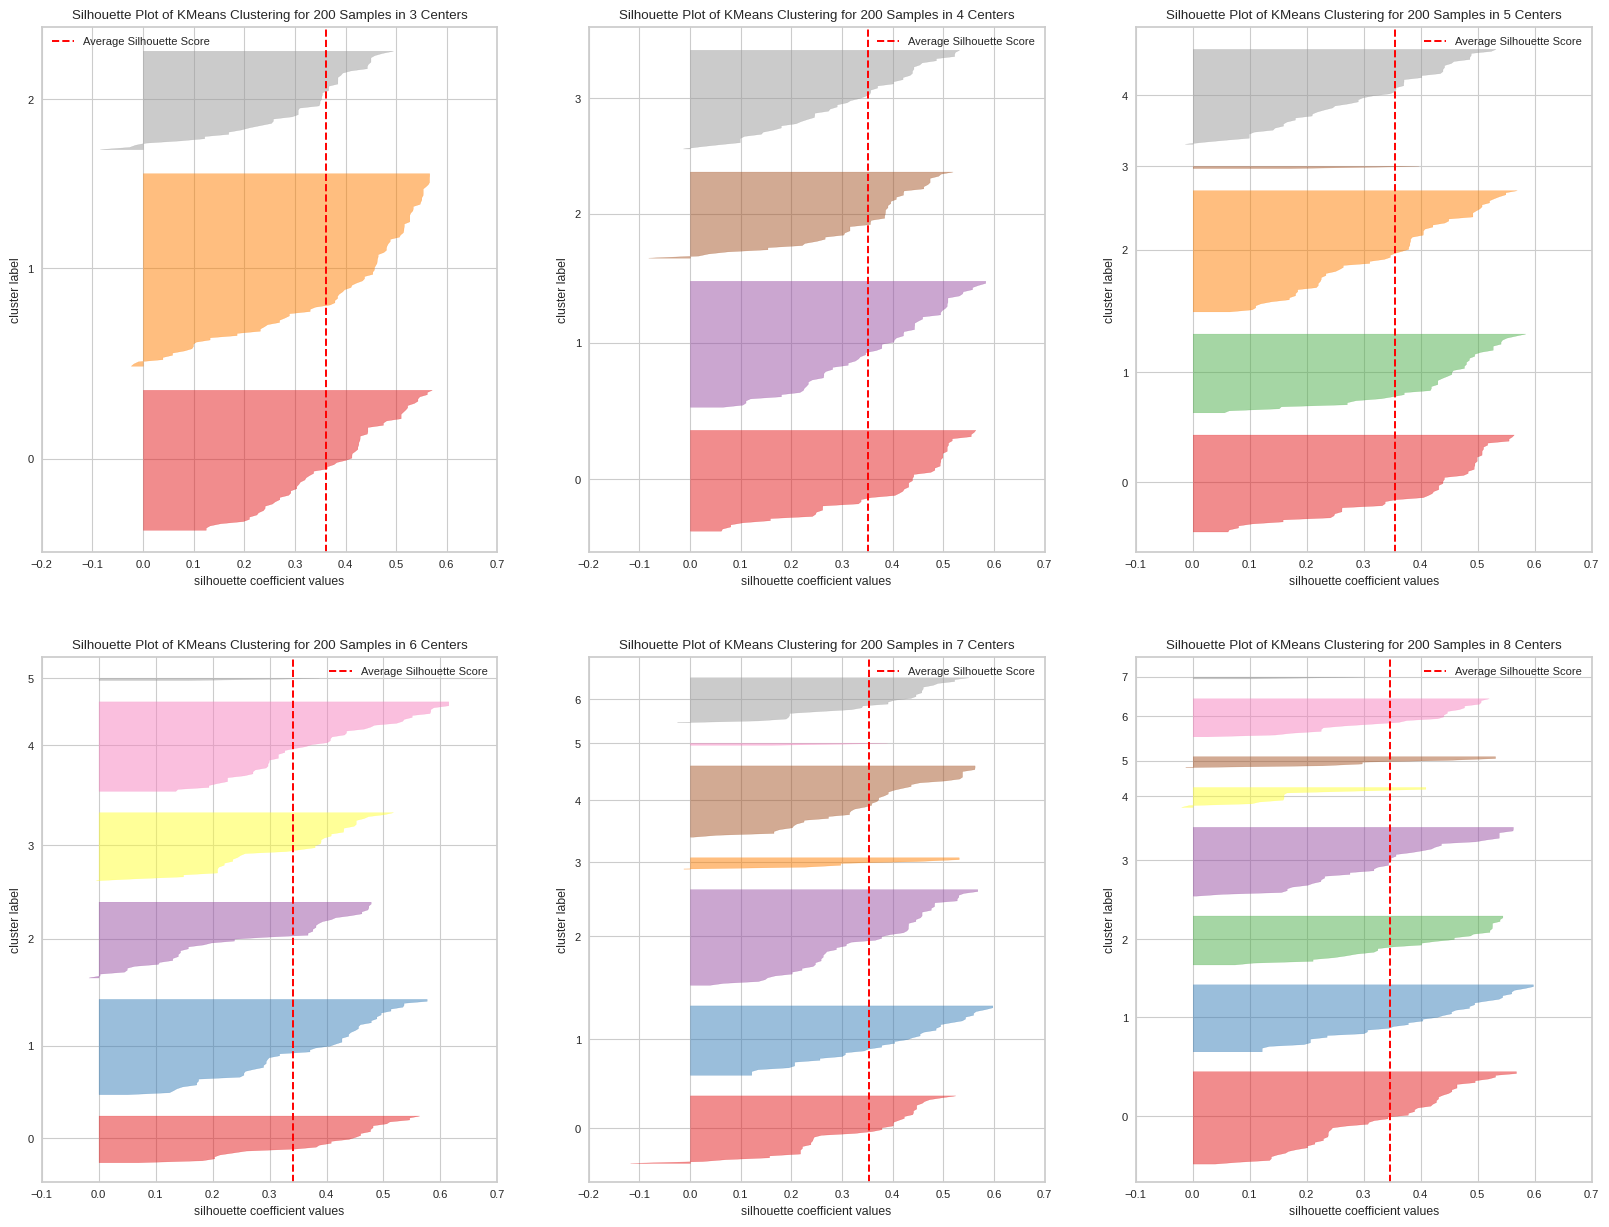

In [45]:
from yellowbrick.cluster import SilhouetteVisualizer
plt.style.use('seaborn-paper')
fig, axs = plt.subplots(2, 3, figsize=(20, 15))
axs = axs.reshape(6)
for i, k in enumerate(range(3, 9)):
    ax = axs[i]
    sil = SilhouetteVisualizer(KMeans(n_clusters = k, n_init = 100, init='k-means++', random_state = 0), ax=ax)
    sil.fit(X_PCA_4)
    sil.finalize()

**Going Ahead with 4 clusters**

In [46]:
km_4 = KMeans(n_clusters = 4, n_init = 100, init='k-means++', random_state = 0)
KM_4 = km_4.fit(X_PCA_4)

In [47]:
KM_4.labels_

array([3, 0, 2, 0, 1, 2, 2, 0, 1, 0, 2, 3, 3, 0, 2, 2, 1, 1, 0, 0, 2, 2,
       3, 1, 2, 0, 2, 3, 1, 0, 3, 0, 0, 2, 1, 1, 3, 3, 0, 0, 1, 2, 2, 3,
       3, 3, 2, 1, 3, 3, 0, 2, 3, 1, 0, 0, 1, 1, 1, 1, 3, 0, 3, 3, 1, 0,
       1, 1, 1, 0, 2, 3, 0, 1, 3, 1, 1, 1, 2, 0, 1, 0, 3, 1, 3, 3, 0, 3,
       3, 2, 2, 2, 3, 1, 2, 1, 0, 3, 0, 1, 0, 1, 1, 2, 0, 1, 3, 1, 0, 2,
       2, 0, 1, 0, 2, 1, 2, 0, 3, 1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 0, 3, 0,
       3, 3, 0, 3, 3, 1, 1, 0, 2, 3, 1, 1, 3, 0, 1, 0, 2, 3, 1, 0, 2, 2,
       3, 0, 3, 3, 1, 1, 2, 2, 2, 1, 0, 3, 1, 0, 2, 1, 2, 3, 1, 1, 0, 3,
       1, 3, 2, 3, 1, 1, 2, 0, 0, 1, 3, 1, 2, 2, 3, 3, 1, 2, 0, 2, 3, 1,
       0, 0], dtype=int32)

In [49]:
ny_df['cluster_4'] = KM_4.labels_

In [50]:
ny_df.head()

,Unnamed: 0,County,Borough,TotalPop,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,Employed,Latitude,Longitude,cluster_4
8740,8740,New York,Manhattan,3238,44286.0,12364.0,45340.0,10430.0,32.9,1419,40.848593,-73.928593,3
71877,71877,New York,Manhattan,11069,48242.0,6962.0,21637.0,2257.0,14.9,5983,40.724221,-73.966583,0
12662,12662,New York,Manhattan,3726,168375.0,33442.0,104742.0,18715.0,11.9,1996,40.755879,-73.998241,2
6606,6606,New York,Manhattan,7240,30056.0,7828.0,24697.0,3561.0,34.7,3069,40.753618,-73.979246,0
20839,20839,New York,Manhattan,8957,111476.0,13572.0,108123.0,17441.0,10.2,6056,40.735528,-73.982412,1


In [51]:
ny_df.to_csv("/content/drive/MyDrive/NY_combined.csv")

**Kings County CLustering**

In [25]:
kings_df = kings_df.sample(n=200, random_state=42)
kings_df.head()

,Unnamed: 0,County,Borough,TotalPop,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,Employed,Latitude,Longitude
494785,494785,Kings,Brooklyn,3840,62431.0,10888.0,26339.0,4996.0,13.9,1875,40.559146,-74.001407
1271,1271,Kings,Brooklyn,1868,34740.0,13495.0,11694.0,2065.0,39.8,757,40.690302,-73.906432
473016,473016,Kings,Brooklyn,4274,43046.0,5975.0,19849.0,2412.0,17.5,1822,40.568191,-73.944422
326379,326379,Kings,Brooklyn,1367,96146.0,13423.0,69754.0,10753.0,7.2,986,40.692563,-73.979246
272085,272085,Kings,Brooklyn,3394,34729.0,6529.0,17988.0,3057.0,22.4,1310,40.595327,-73.966583


In [26]:
new_kings_df = kings_df.drop(columns = ['Unnamed: 0', 'County', 'Borough','Latitude','Longitude'])
new_kings_df.head()

,TotalPop,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,Employed
494785,3840,62431.0,10888.0,26339.0,4996.0,13.9,1875
1271,1868,34740.0,13495.0,11694.0,2065.0,39.8,757
473016,4274,43046.0,5975.0,19849.0,2412.0,17.5,1822
326379,1367,96146.0,13423.0,69754.0,10753.0,7.2,986
272085,3394,34729.0,6529.0,17988.0,3057.0,22.4,1310


In [27]:
from sklearn.preprocessing import StandardScaler
numerical_columns = ['TotalPop', 'Income', 'IncomeErr','IncomePerCap', 'IncomePerCapErr', 'Poverty', 'Employed']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
new_kings_df[numerical_columns] = scaler.fit_transform(new_kings_df[numerical_columns])

new_kings_df.head()

,TotalPop,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,Employed
494785,0.214329,0.348118,-0.204855,-0.091033,0.040767,-0.654525,0.423374
1271,-1.145943,-0.788809,0.137082,-1.036449,-0.812985,1.357485,-1.165443
473016,0.513699,-0.447784,-0.849249,-0.509998,-0.711909,-0.374863,0.348055
326379,-1.491530,1.732377,0.127638,2.711648,1.717684,-1.175006,-0.840005
272085,-0.093319,-0.789261,-0.776586,-0.630136,-0.524032,0.005787,-0.379561


In [28]:
PCA_4 = PCA(n_components=4)
X_PCA_4 = PCA_4.fit_transform(new_kings_df)
PC = pd.DataFrame(X_PCA_4, columns=['PC1 PC2 PC3 PC4'.split()])
PC

,PC1,PC2,PC3,PC4
0,0.295791,0.500454,-0.599066,-0.071920
1,-1.554889,-1.891529,0.629867,-0.247415
2,-1.038835,0.552549,-0.855677,-0.035451
3,3.660901,-0.922945,-0.396222,1.650050
4,-1.216887,-0.432493,-0.461774,0.185180
...,...,...,...,...
195,-0.330926,-0.261822,-0.744013,-0.053295
196,-1.382314,-0.048340,0.395797,0.102025
197,-0.119733,-1.080979,-0.437893,-0.404770
198,-1.293764,-0.861200,-0.296074,0.287246


In [29]:
wcss = []
sil_kmeans = []

for i in range(3,9):

    # K-Means Clustering:
    kmeans = KMeans(n_clusters = i, n_init = 100, init='k-means++', random_state = 0)
    kmeans.fit(X_PCA_4)

     # Inertia and Silhouette Score for Clusters using K-Means:
    in_km = kmeans.inertia_
    wcss.append(in_km)
    sil_km = silhouette_score(X_PCA_4, kmeans.labels_)
    sil_kmeans.append(sil_km)

    print('Number of clusters:', i)
    print('KMeans Inertia', in_km)
    print('Silhouette Score for KMeans:', sil_km)
    print()

Number of clusters: 3
KMeans Inertia 672.3120388626136
Silhouette Score for KMeans: 0.2907413046324205

Number of clusters: 4
KMeans Inertia 541.1258522151982
Silhouette Score for KMeans: 0.2749679887509701

Number of clusters: 5
KMeans Inertia 478.4350928287107
Silhouette Score for KMeans: 0.25741795266740986

Number of clusters: 6
KMeans Inertia 428.3541251932955
Silhouette Score for KMeans: 0.2507919122281948

Number of clusters: 7
KMeans Inertia 376.3902772002984
Silhouette Score for KMeans: 0.2605838235629366

Number of clusters: 8
KMeans Inertia 343.81354542773624
Silhouette Score for KMeans: 0.26454215511155843



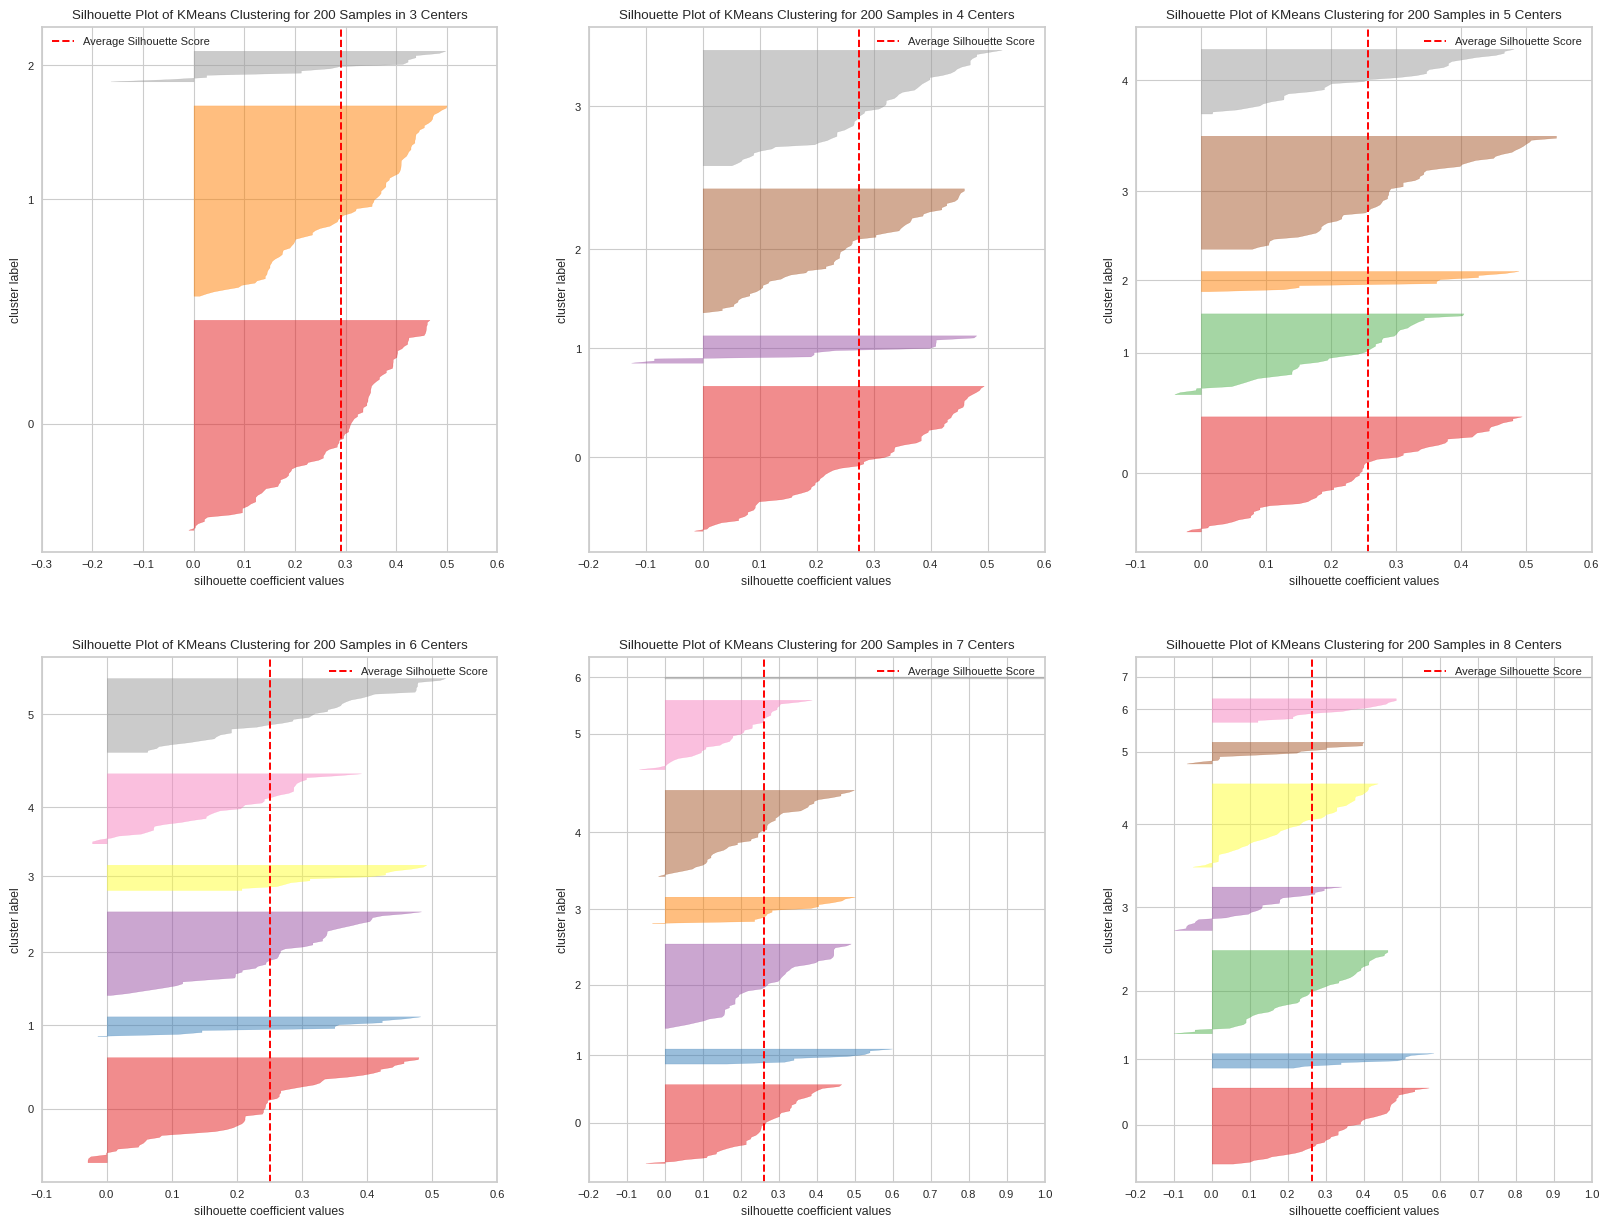

In [30]:
from yellowbrick.cluster import SilhouetteVisualizer
plt.style.use('seaborn-paper')
fig, axs = plt.subplots(2, 3, figsize=(20, 15))
axs = axs.reshape(6)
for i, k in enumerate(range(3, 9)):
    ax = axs[i]
    sil = SilhouetteVisualizer(KMeans(n_clusters = k, n_init = 100, init='k-means++', random_state = 0), ax=ax)
    sil.fit(X_PCA_4)
    sil.finalize()

**4 Centers is good to go**

In [31]:
km_4 = KMeans(n_clusters = 4, n_init = 100, init='k-means++', random_state = 0)
KM_4 = km_4.fit(X_PCA_4)

In [32]:
KM_4.labels_

array([0, 3, 2, 1, 3, 2, 0, 2, 3, 3, 0, 3, 3, 3, 0, 0, 0, 1, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 3, 2, 2, 0, 0, 0,
       3, 2, 0, 1, 2, 2, 2, 1, 1, 3, 0, 0, 3, 3, 0, 3, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 1, 3, 3, 3, 3, 3, 2, 2, 3, 2, 0, 3, 2, 2, 2, 3, 2, 0,
       3, 0, 3, 2, 3, 2, 1, 2, 3, 3, 2, 0, 0, 2, 3, 2, 3, 2, 0, 0, 3, 1,
       0, 2, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 2, 0, 3, 2, 3, 1,
       2, 3, 2, 0, 2, 2, 2, 0, 0, 0, 3, 0, 2, 0, 0, 3, 0, 0, 3, 3, 2, 0,
       2, 0, 1, 2, 1, 3, 0, 0, 2, 3, 0, 2, 2, 3, 3, 2, 2, 0, 0, 3, 3, 2,
       2, 2, 3, 3, 2, 0, 3, 2, 3, 1, 2, 0, 0, 0, 0, 2, 2, 0, 3, 0, 3, 0,
       3, 3], dtype=int32)

In [35]:
kings_df['cluster_4'] = KM_4.labels_

In [37]:
kings_df = kings_df.drop(columns=['cluster_3'])
kings_df.head()

,Unnamed: 0,County,Borough,TotalPop,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,Employed,Latitude,Longitude,cluster_4
494785,494785,Kings,Brooklyn,3840,62431.0,10888.0,26339.0,4996.0,13.9,1875,40.559146,-74.001407,0
1271,1271,Kings,Brooklyn,1868,34740.0,13495.0,11694.0,2065.0,39.8,757,40.690302,-73.906432,3
473016,473016,Kings,Brooklyn,4274,43046.0,5975.0,19849.0,2412.0,17.5,1822,40.568191,-73.944422,2
326379,326379,Kings,Brooklyn,1367,96146.0,13423.0,69754.0,10753.0,7.2,986,40.692563,-73.979246,1
272085,272085,Kings,Brooklyn,3394,34729.0,6529.0,17988.0,3057.0,22.4,1310,40.595327,-73.966583,3


In [38]:
kings_df.to_csv("/content/drive/MyDrive/Kings_Combined.csv")

**Brnox County Clutering**

In [4]:
bronx_df = bronx_df.sample(n=200, random_state=42)
bronx_df.head()
# bronx_df.columns

,Unnamed: 0,County,Borough,TotalPop,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,Employed,Latitude,Longitude
43796,43796,Bronx,Bronx,6243,41487.0,5816.0,21913.0,2568.0,20.3,2893,40.859899,-73.801960
88498,88498,Bronx,Bronx,3297,19362.0,4876.0,12248.0,1916.0,48.7,1371,40.891558,-73.919095
79413,79413,Bronx,Bronx,1960,22250.0,7615.0,13681.0,2185.0,44.4,699,40.801106,-73.912764
46039,46039,Bronx,Bronx,5010,18664.0,2947.0,9696.0,1359.0,49.7,1600,40.807889,-73.839950
61310,61310,Bronx,Bronx,3035,52450.0,9492.0,28686.0,4498.0,15.0,1435,40.812412,-73.922261


In [5]:
new_bronx_df = bronx_df.drop(columns = ['Unnamed: 0', 'County', 'Borough','Latitude','Longitude'])
new_bronx_df.head()

,TotalPop,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,Employed
43796,6243,41487.0,5816.0,21913.0,2568.0,20.3,2893
88498,3297,19362.0,4876.0,12248.0,1916.0,48.7,1371
79413,1960,22250.0,7615.0,13681.0,2185.0,44.4,699
46039,5010,18664.0,2947.0,9696.0,1359.0,49.7,1600
61310,3035,52450.0,9492.0,28686.0,4498.0,15.0,1435


In [6]:
from sklearn.preprocessing import StandardScaler
numerical_columns = ['TotalPop', 'Income', 'IncomeErr','IncomePerCap', 'IncomePerCapErr', 'Poverty', 'Employed']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
new_bronx_df[numerical_columns] = scaler.fit_transform(new_bronx_df[numerical_columns])

new_bronx_df.head()

,TotalPop,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,Employed
43796,0.764203,0.162594,-0.538224,0.382976,-0.400399,-0.709038,1.150867
88498,-0.404678,-0.976903,-0.720360,-0.769616,-0.730560,1.229885,-0.296507
79413,-0.935158,-0.828164,-0.189646,-0.598725,-0.594343,0.936315,-0.935558
46039,0.274987,-1.012852,-1.094127,-1.073953,-1.012615,1.298157,-0.078735
61310,-0.508632,0.727219,0.174046,1.190685,0.576919,-1.070879,-0.235645


Number of Clusters: 1 	Average Distortion: 2.382997484848094
Number of Clusters: 2 	Average Distortion: 1.8171581569984538
Number of Clusters: 3 	Average Distortion: 1.6133936002707612
Number of Clusters: 4 	Average Distortion: 1.502822196881179
Number of Clusters: 5 	Average Distortion: 1.3841922914710474
Number of Clusters: 6 	Average Distortion: 1.3177727372198924
Number of Clusters: 7 	Average Distortion: 1.2645201099609884
Number of Clusters: 8 	Average Distortion: 1.1548175014843522


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

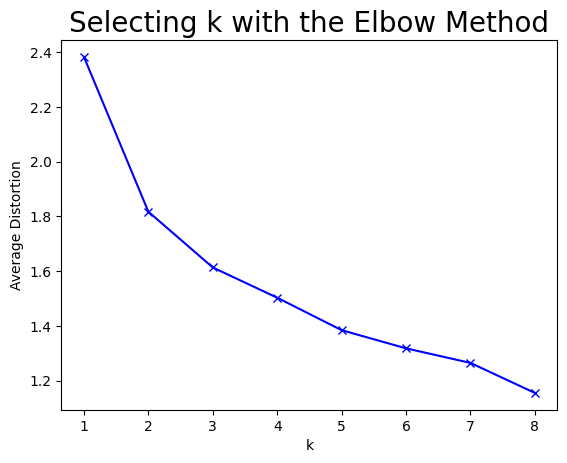

In [18]:
# Import necessary libraries
# from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(new_bronx_df)
    prediction=model.predict(new_bronx_df)
    distortion=sum(np.min(cdist(new_bronx_df, model.cluster_centers_, 'euclidean'), axis=1)) / new_bronx_df.shape[0]

    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

In [20]:
# checking silhoutte score
# For n_clusters = 6, silhouette score is 0.2460090529540997)
# For n_clusters = 7, silhouette score is 0.2442958319471606)
# For n_clusters = 8, silhouette score is 0.23220928006775945)
from sklearn.metrics import silhouette_score
sil_score = []
cluster_list = list(range(2,9))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((new_bronx_df))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(new_bronx_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4336100522721849)
For n_clusters = 3, silhouette score is 0.3104477275897798)
For n_clusters = 4, silhouette score is 0.3113786885170461)
For n_clusters = 5, silhouette score is 0.26061185769019424)
For n_clusters = 6, silhouette score is 0.2641617789726633)
For n_clusters = 7, silhouette score is 0.24868080940335338)
For n_clusters = 8, silhouette score is 0.2751580048203171)


**PCA analysis**

In [14]:
PCA_4 = PCA(n_components=4)
X_PCA_4 = PCA_4.fit_transform(new_bronx_df)
PC = pd.DataFrame(X_PCA_4, columns=['PC1 PC2 PC3 PC4'.split()])
PC

,PC1,PC2,PC3,PC4
0,0.020757,1.515916,-0.142477,-0.799592
1,-1.864562,-0.849642,0.086508,0.002779
2,-1.187638,-1.582518,-0.160068,0.168226
3,-2.440150,-0.283728,0.053834,-0.193753
4,1.808613,-0.130544,0.191731,-0.574595
...,...,...,...,...
195,0.758358,-0.062700,0.140696,-1.402759
196,-2.440150,-0.283728,0.053834,-0.193753
197,1.026897,-0.512365,-1.177511,0.734631
198,-0.003637,-0.523327,0.022077,-0.347787


In [15]:
wcss = []
sil_kmeans = []

for i in range(3,9):

    # K-Means Clustering:
    kmeans = KMeans(n_clusters = i, n_init = 100, init='k-means++', random_state = 0)
    kmeans.fit(X_PCA_4)

     # Inertia and Silhouette Score for Clusters using K-Means:
    in_km = kmeans.inertia_
    wcss.append(in_km)
    sil_km = silhouette_score(X_PCA_4, kmeans.labels_)
    sil_kmeans.append(sil_km)

    print('Number of clusters:', i)
    print('KMeans Inertia', in_km)
    print('Silhouette Score for KMeans:', sil_km)
    print()

Number of clusters: 3
KMeans Inertia 603.9078376169239
Silhouette Score for KMeans: 0.4539275161261703

Number of clusters: 4
KMeans Inertia 508.6780710904549
Silhouette Score for KMeans: 0.3074957979376649

Number of clusters: 5
KMeans Inertia 428.1198700387961
Silhouette Score for KMeans: 0.26367039566843314

Number of clusters: 6
KMeans Inertia 372.80564469514445
Silhouette Score for KMeans: 0.28103251341874935

Number of clusters: 7
KMeans Inertia 324.9934383130771
Silhouette Score for KMeans: 0.26671553327920006

Number of clusters: 8
KMeans Inertia 289.8967159409216
Silhouette Score for KMeans: 0.2780890373161266



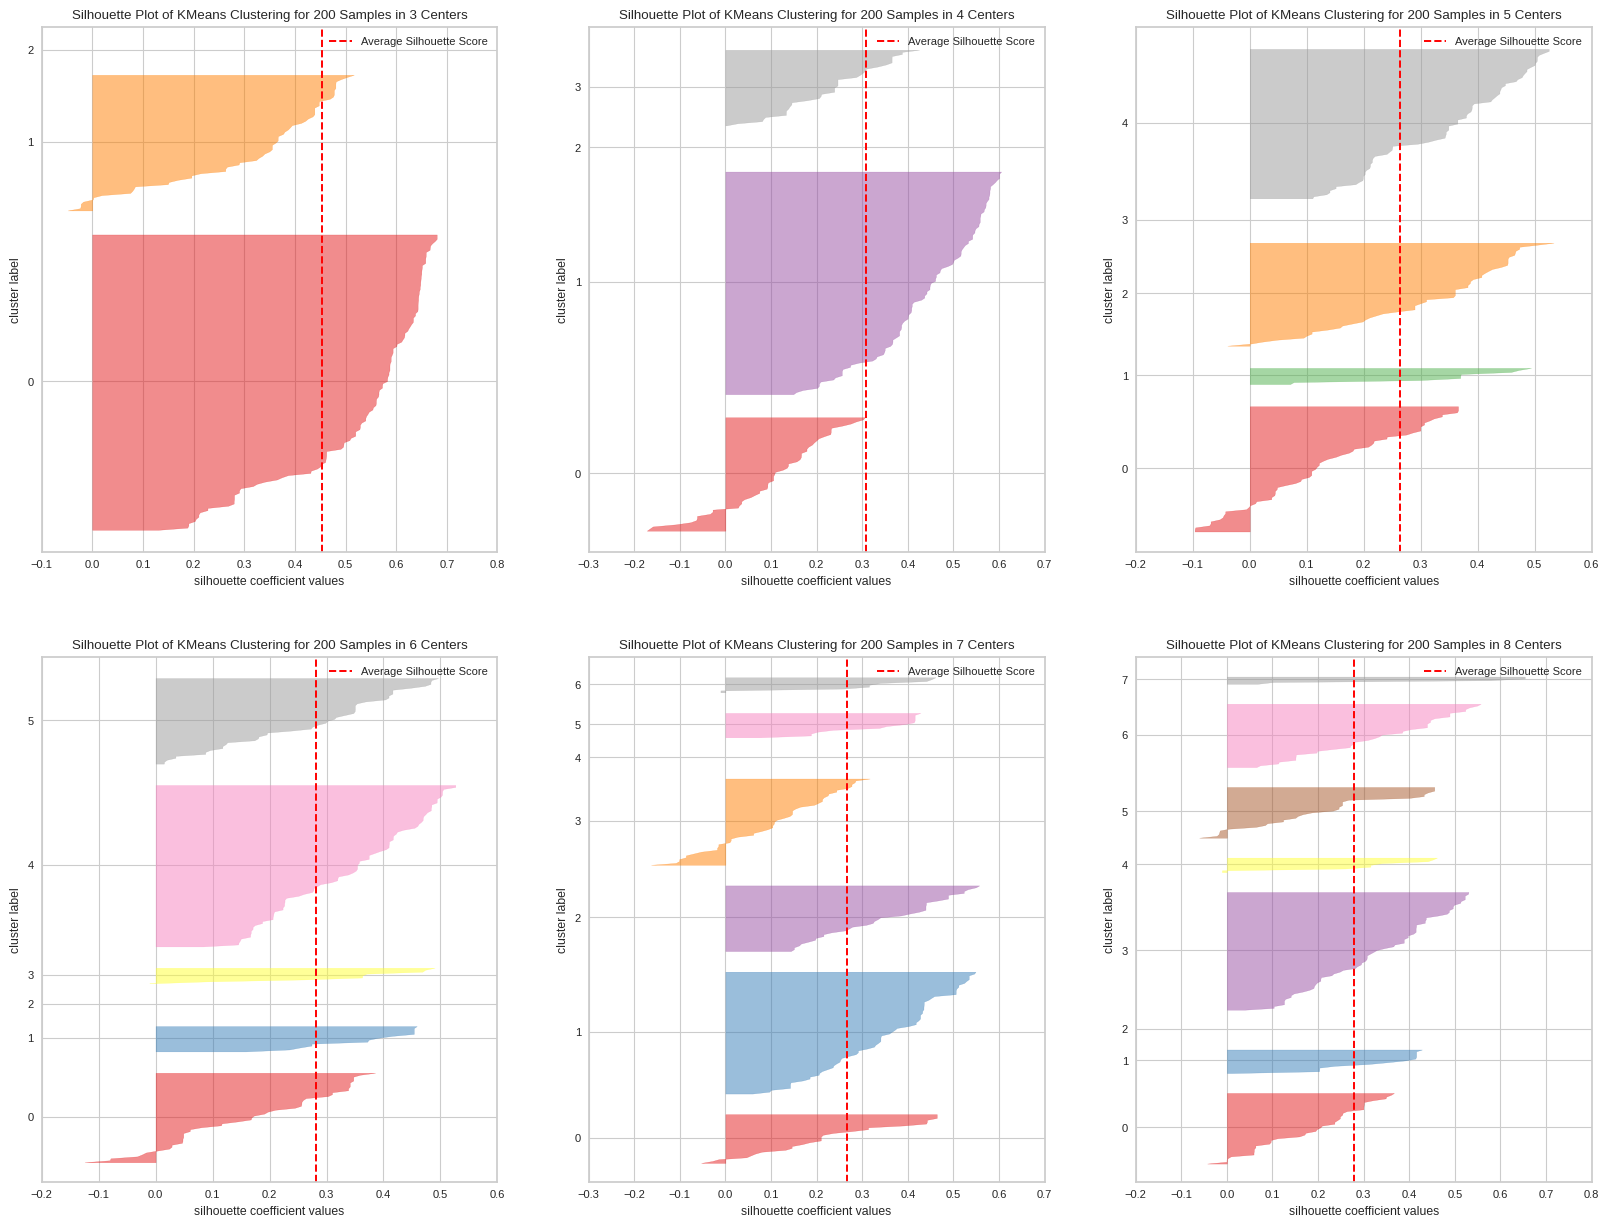

In [16]:
from yellowbrick.cluster import SilhouetteVisualizer
plt.style.use('seaborn-paper')
fig, axs = plt.subplots(2, 3, figsize=(20, 15))
axs = axs.reshape(6)
for i, k in enumerate(range(3, 9)):
    ax = axs[i]
    sil = SilhouetteVisualizer(KMeans(n_clusters = k, n_init = 100, init='k-means++', random_state = 0), ax=ax)
    sil.fit(X_PCA_4)
    sil.finalize()

**Taking the number of cluster = 4**

In [19]:
km_4 = KMeans(n_clusters = 4, n_init = 100, init='k-means++', random_state = 0)
KM_4 = km_4.fit(X_PCA_4)

In [20]:
KM_4.labels_

array([0, 1, 1, 1, 0, 1, 1, 1, 3, 1, 1, 1, 0, 1, 0, 1, 1, 3, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 3, 1, 3, 0, 1, 1, 3, 1, 1, 1, 1, 1, 3, 0, 1,
       1, 3, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 3, 1, 0, 0, 1, 3, 3, 1, 1,
       3, 0, 1, 0, 0, 3, 0, 1, 0, 1, 1, 1, 0, 3, 0, 1, 1, 0, 1, 1, 0, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 3,
       1, 1, 3, 1, 3, 1, 3, 0, 1, 3, 1, 1, 3, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 3, 1, 0, 0, 1, 1, 0, 3, 1, 0, 1, 1, 1, 0, 1, 1, 3, 3, 1, 0, 2,
       3, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 3, 0, 0, 0, 0, 1, 3,
       3, 0, 1, 3, 1, 1, 0, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0], dtype=int32)

In [22]:
bronx_df['cluster_3'] = KM_4.labels_